# Reading Data and EDA

## Reading Data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mon = pd.read_csv("./data/monday.csv", sep = ";", parse_dates=True)
tue = pd.read_csv("./data/tuesday.csv", sep = ";", parse_dates=True)
wed = pd.read_csv("./data/wednesday.csv", sep = ";", parse_dates=True)
thur =pd.read_csv("./data/thursday.csv", sep = ";", parse_dates=True)
fri = pd.read_csv("./data/friday.csv", sep = ";", parse_dates=True)

In [3]:
mon.head(10)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


## General Exploring (describe and info functions)

In [4]:
round(mon.describe(), 1)

,customer_no
count,4884.0
mean,718.3
std,411.8
min,1.0
25%,366.0
50%,720.0
75%,1070.0
max,1447.0


In [5]:
round(tue.describe(), 1)

,customer_no
count,4714.0
mean,706.1
std,414.2
min,1.0
25%,338.2
50%,710.0
75%,1067.8
max,1422.0


In [6]:
round(wed.describe(), 1)

,customer_no
count,5050.0
mean,765.6
std,441.2
min,1.0
25%,381.2
50%,764.5
75%,1154.0
max,1531.0


In [7]:
round(thur.describe(), 1)

,customer_no
count,5104.0
mean,777.4
std,437.9
min,1.0
25%,400.8
50%,784.0
75%,1154.0
max,1535.0


In [8]:
round(fri.describe(), 1)

,customer_no
count,5125.0
mean,754.4
std,435.5
min,1.0
25%,372.0
50%,756.0
75%,1123.0
max,1510.0


In [9]:
mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [10]:
tue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4714 non-null   object
 1   customer_no  4714 non-null   int64 
 2   location     4714 non-null   object
dtypes: int64(1), object(2)
memory usage: 110.6+ KB


In [11]:
wed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    5050 non-null   object
 1   customer_no  5050 non-null   int64 
 2   location     5050 non-null   object
dtypes: int64(1), object(2)
memory usage: 118.5+ KB


In [12]:
thur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    5104 non-null   object
 1   customer_no  5104 non-null   int64 
 2   location     5104 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.8+ KB


In [13]:
fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    5125 non-null   object
 1   customer_no  5125 non-null   int64 
 2   location     5125 non-null   object
dtypes: int64(1), object(2)
memory usage: 120.2+ KB


## Taking care of missing checkouts and creating unique customer_no

In [14]:
def check_out(df):
    """ 
    This function create rows for the customers that miss checkout time. It will
    set the last time in timestamp column as the checkout time for thenew rows.
    """
    index = range(len(df))
    reg_cus = []
    unreg_cus = []
    for i in index:
        if df.iloc[i]['location'] == 'checkout':
            reg_cus. append(df.iloc[i]['customer_no'])
    for cus in df['customer_no']:
        if cus not in reg_cus:
            unreg_cus. append(cus)
    for cus in unreg_cus:
        new_row = {"timestamp":"2019-09-02 21:50:00", "customer_no": cus, "location":"checkout"}
        df = df.append(new_row, ignore_index=True)
    return df

In [15]:
mon = check_out(mon)
tue = check_out(tue)
wed = check_out(wed)
thur = check_out(thur)
fri = check_out(fri)

In [16]:
mon.tail(25)

,timestamp,customer_no,location
4882,2019-09-02 21:50:00,1446,dairy
4883,2019-09-02 21:50:00,1447,fruit
4884,2019-09-02 21:50:00,1430,checkout
4885,2019-09-02 21:50:00,1433,checkout
4886,2019-09-02 21:50:00,1430,checkout
4887,2019-09-02 21:50:00,1430,checkout
4888,2019-09-02 21:50:00,1437,checkout
4889,2019-09-02 21:50:00,1437,checkout
4890,2019-09-02 21:50:00,1433,checkout
4891,2019-09-02 21:50:00,1439,checkout


In [17]:
def id_correction(df, day):
    """This function changes the values of customer_no column because we need unique ids 
    for customers of each day to be able to merge dataframes of all 5 days."""
    for i, cus in enumerate(df['customer_no']):
        new = str(cus) + '-' + day
        df.at[i, 'customer_no'] = new
    return df

In [18]:
mon = id_correction(mon, 'mon')
mon.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1-mon,dairy
1,2019-09-02 07:03:00,2-mon,dairy
2,2019-09-02 07:04:00,3-mon,dairy
3,2019-09-02 07:04:00,4-mon,dairy
4,2019-09-02 07:04:00,5-mon,spices


In [296]:
mon.tail()

,timestamp,customer_no,location,hour,min
4902,2019-09-02 21:50:00,1440-mon,checkout,21,50
4903,2019-09-02 21:50:00,1441-mon,checkout,21,50
4904,2019-09-02 21:50:00,1445-mon,checkout,21,50
4905,2019-09-02 21:50:00,1446-mon,checkout,21,50
4906,2019-09-02 21:50:00,1447-mon,checkout,21,50


In [19]:
tue = id_correction(tue, 'tue')
tue.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1-tue,fruit
1,2019-09-03 07:02:00,2-tue,drinks
2,2019-09-03 07:03:00,3-tue,dairy
3,2019-09-03 07:05:00,1-tue,drinks
4,2019-09-03 07:06:00,4-tue,dairy


In [20]:
wed = id_correction(wed, 'wed')
wed.head()

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1-wed,fruit
1,2019-09-04 07:00:00,2-wed,dairy
2,2019-09-04 07:00:00,3-wed,fruit
3,2019-09-04 07:00:00,4-wed,fruit
4,2019-09-04 07:00:00,5-wed,dairy


In [21]:
thur = id_correction(thur, 'thur')
thur.head()

,timestamp,customer_no,location
0,2019-09-05 07:00:00,1-thur,drinks
1,2019-09-05 07:01:00,2-thur,fruit
2,2019-09-05 07:01:00,3-thur,dairy
3,2019-09-05 07:01:00,4-thur,dairy
4,2019-09-05 07:02:00,1-thur,checkout


In [22]:
fri = id_correction(fri, 'fri')
fri.head()

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1-fri,dairy
1,2019-09-06 07:00:00,2-fri,drinks
2,2019-09-06 07:00:00,3-fri,fruit
3,2019-09-06 07:01:00,2-fri,checkout
4,2019-09-06 07:01:00,4-fri,drinks


## Merging the dataframes

In [23]:
df = pd.concat([mon, tue, wed, thur, fri])
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1-mon,dairy
1,2019-09-02 07:03:00,2-mon,dairy
2,2019-09-02 07:04:00,3-mon,dairy
3,2019-09-02 07:04:00,4-mon,dairy
4,2019-09-02 07:04:00,5-mon,spices


In [24]:
df.shape

(24956, 3)

## EDA questions

### Calculate the total number of customers in each section

In [25]:
mon['location'].value_counts()

checkout    1460
fruit       1005
dairy        895
drinks       797
spices       750
Name: location, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers in Each Section on 02.09.2016')

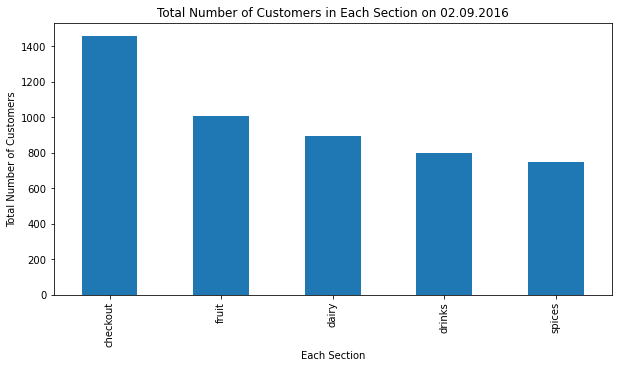

In [26]:
mon['location'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.ylabel('Total Number of Customers')
plt.xlabel('Each Section')
plt.title('Total Number of Customers in Each Section on 02.09.2016')

In [27]:
df['location'].value_counts()

checkout    7496
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers in Each Section in First Week of September 2019')

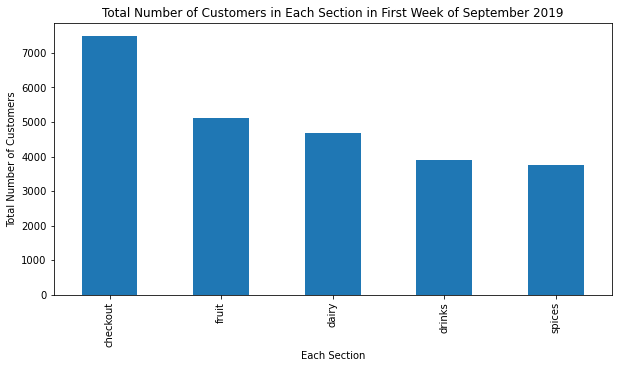

In [28]:
df['location'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.ylabel('Total Number of Customers')
plt.xlabel('Each Section')
plt.title('Total Number of Customers in Each Section in First Week of September 2019')

### Calculate the total number of customers in each section over time

In [29]:
df['day'] = pd.to_datetime(df['timestamp']).dt.day
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

In [30]:
df['day'].unique()

array([2, 3, 4, 5, 6])

In [31]:
df['hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

Text(0.5, 1.0, 'Total Number of Customers in Each Section over days of first week in September 2019')

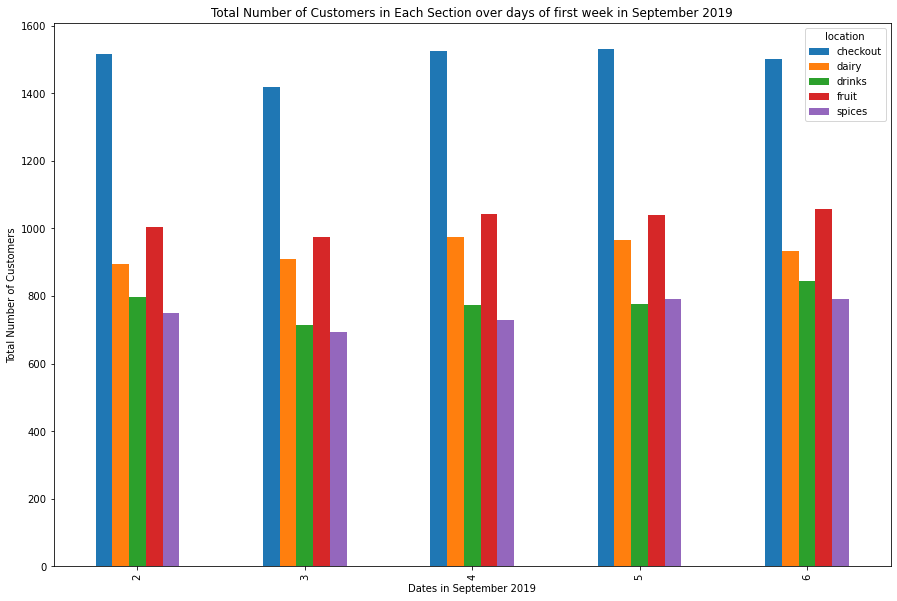

In [32]:
df.groupby(['day', 'location'])['customer_no'].count().unstack().plot(kind='bar', figsize=(15, 10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Dates in September 2019')
plt.title('Total Number of Customers in Each Section over days of first week in September 2019')

Text(0.5, 1.0, 'Total Number of Customers in Each Section over Daily Hours of first week in September 2019')

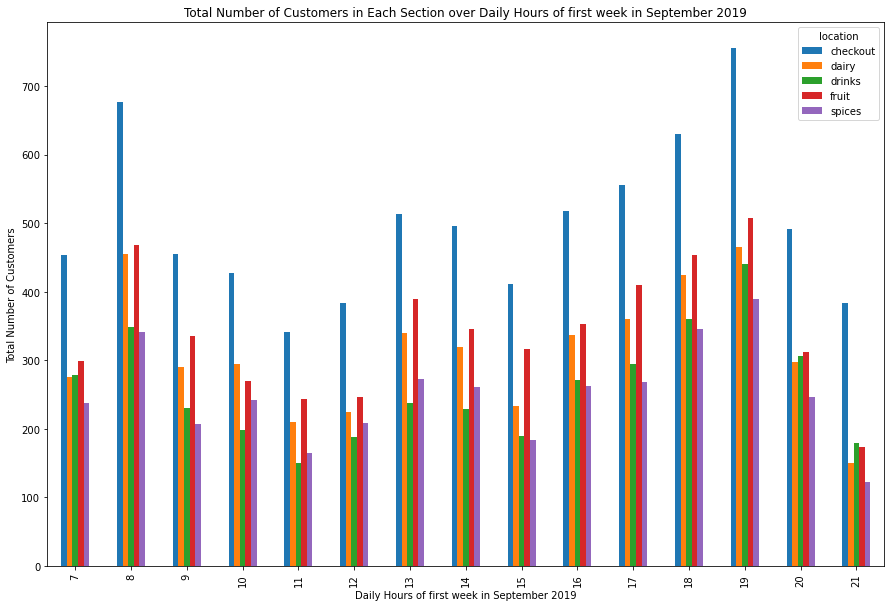

In [33]:
df.groupby(['hour', 'location'])['customer_no'].count().unstack().plot(kind='bar', figsize=(15, 10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Daily Hours of first week in September 2019')
plt.title('Total Number of Customers in Each Section over Daily Hours of first week in September 2019')

Text(0.5, 1.0, 'Total Number of Customers in Each Section over Hours on 02.09.2019')

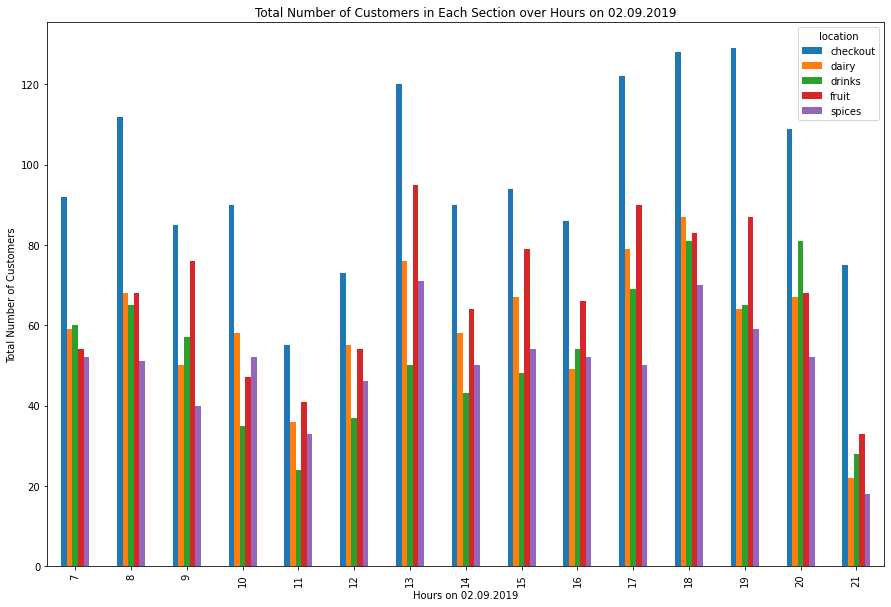

In [34]:
mon['hour'] = pd.to_datetime(mon['timestamp']).dt.hour
mon.groupby(['hour', 'location'])['customer_no'].count().unstack().plot(kind='bar', figsize=(15, 10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Hours on 02.09.2019')
plt.title('Total Number of Customers in Each Section over Hours on 02.09.2019')

Text(0.5, 1.0, 'Total Number of Customers over Minutes on 02.09.2019')

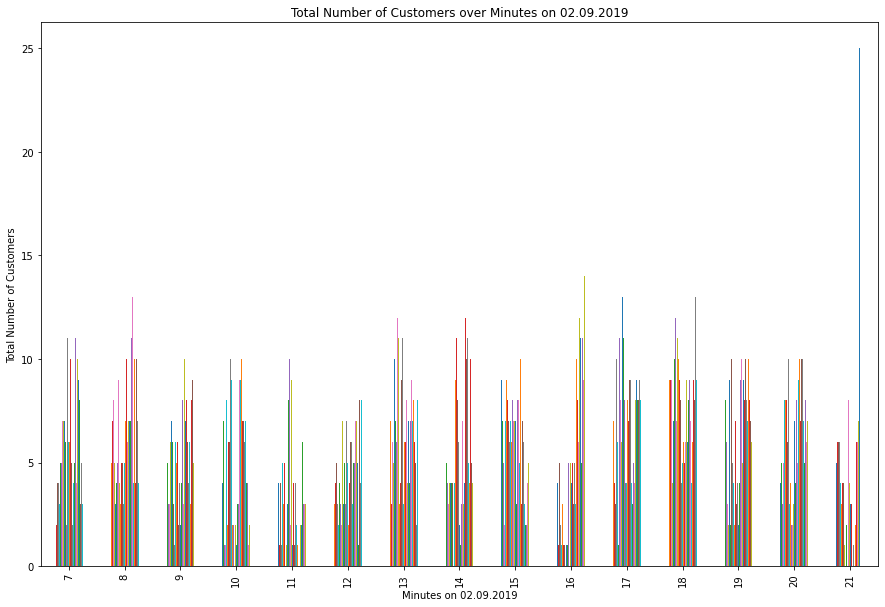

In [35]:
mon['min'] = pd.to_datetime(mon['timestamp']).dt.minute
mon.groupby(['hour','min'])['customer_no'].count().unstack().plot(kind='bar', figsize=(15, 10), legend = False)
plt.ylabel('Total Number of Customers')
plt.xlabel('Minutes on 02.09.2019')
plt.title('Total Number of Customers over Minutes on 02.09.2019')

### Display the number of customers at checkout over time

Text(0.5, 1.0, 'Total Number of Customers in Checkout Section over days of first week in September 2019')

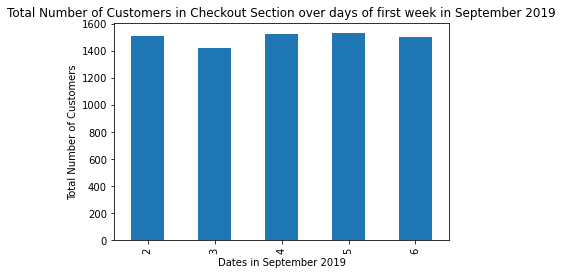

In [36]:
data = df[df['location']== 'checkout']
data.groupby(['day'])['customer_no'].count().plot(kind='bar')
plt.ylabel('Total Number of Customers')
plt.xlabel('Dates in September 2019')
plt.title('Total Number of Customers in Checkout Section over days of first week in September 2019')

Text(0.5, 1.0, 'Total Number of Customers in Checkout Section over Hours on 02.09.2019')

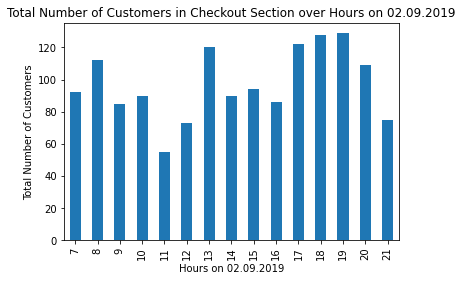

In [37]:
data = mon[mon['location']== 'checkout']
data.groupby(['hour'])['customer_no'].count().plot(kind='bar')
plt.ylabel('Total Number of Customers')
plt.xlabel('Hours on 02.09.2019')
plt.title('Total Number of Customers in Checkout Section over Hours on 02.09.2019')

### Calculate the time each customer spent in the market

#### preprations

In [38]:
mon['timestamp'] = pd.to_datetime(mon['timestamp'])
mon.iloc[12]['timestamp']- mon.iloc[1]['timestamp']

Timedelta('0 days 00:03:00')

In [39]:
mon.head(20)

,timestamp,customer_no,location,hour,min
0,2019-09-02 07:03:00,1-mon,dairy,7,3
1,2019-09-02 07:03:00,2-mon,dairy,7,3
2,2019-09-02 07:04:00,3-mon,dairy,7,4
3,2019-09-02 07:04:00,4-mon,dairy,7,4
4,2019-09-02 07:04:00,5-mon,spices,7,4
5,2019-09-02 07:04:00,6-mon,spices,7,4
6,2019-09-02 07:04:00,7-mon,spices,7,4
7,2019-09-02 07:04:00,8-mon,fruit,7,4
8,2019-09-02 07:05:00,1-mon,checkout,7,5
9,2019-09-02 07:05:00,5-mon,checkout,7,5


In [40]:
# Example for creating a data frame with a column for stay time of each customer

df_t = {'timestamp':['2019-09-02 07:03:00', '2019-09-02 07:03:00', 
                     '2019-09-02 07:04:00', '2019-09-02 07:04:00',
                    '2019-09-02 07:04:00', '2019-09-02 07:04:00',
                    '2019-09-02 07:04:00', '2019-09-02 07:04:00',
                    '2019-09-02 07:05:00', '2019-09-02 07:05:00',
                    '2019-09-02 07:05:00', '2019-09-02 07:05:00',
                    '2019-09-02 07:06:00', '2019-09-02 07:06:00'],
       'customer_no':['1-mon', '2-mon', '3-mon', '4-mon', '5-mon'
                     , '6-mon', '7-mon', '8-mon', '1-mon', '5-mon'
                     , '6-mon', '7-mon', '2-mon', '3-mon'],
       'location':['dairy', 'dairy', 'dairy', 'dairy', 'spices'
                  , 'spices', 'spices', 'fruit', 'checkout', 'checkout'
                  , 'dairy', 'drinks', 'checkout', 'checkout']}
df_t = pd.DataFrame(df_t)
df_t['timestamp'] = pd.to_datetime(df_t['timestamp'] )
stay_time = []
customers = []

for cus_it1 in df_t['customer_no']:
#     print(f"""shape is {df_t.shape}""")
    entrance = df_t['timestamp'].iloc[0]
    customer = cus_it1
    for j, cus_it2 in enumerate(df_t['customer_no']):
        if (cus_it2 == customer) & (df_t.iloc[j]['location'] == 'checkout'):
            exit = df_t.iloc[j]['timestamp']
    stay_time.append(str(exit - entrance)[7:])
    customers.append(customer)
    df_t = df_t.drop(df_t[df_t['customer_no'] == customer].index)
    if df_t.shape[0] == 0:
        break

customer_stay = {}
for key in customers:
    for value in stay_time:
        customer_stay[key] = value
        stay_time.remove(value)
        break  
   
customer_stay = pd.DataFrame.from_dict(customer_stay, orient='index', columns=['stay_time'])
customer_stay.head(5)
# df_t.head(14)

,stay_time
1-mon,00:02:00
2-mon,00:03:00
3-mon,00:02:00
4-mon,00:02:00
5-mon,00:01:00


#### Don't run again

* Wrong results because I am looping through df which is changing each time

In [41]:
def get_cus_stay_time(df):
    """
    This function converts the timestamp column to a dataframe and  creates two lists, 
    one for customer_no and one for their staying time in the shop. Then it will create a
    dictionary with these two lists and converts it to a dataframe. Finally, it will
    return the dataframe.
    """
    df['timestamp'] = pd.to_datetime(df['timestamp'] )
    stay_time = []
    customers = []

    for cus_it1 in df['customer_no']:
    #     print(f"""shape is {df.shape}""")
        entrance = df['timestamp'].iloc[0]
        customer = cus_it1
        for j, cus_it2 in enumerate(df['customer_no']):
            if (cus_it2 == customer) & (df.iloc[j]['location'] == 'checkout'):
                exit = df.iloc[j]['timestamp']
        stay_time.append(str(exit - entrance)[7:])
        customers.append(customer)
        df = df.drop(df.loc[df['customer_no'] == customer].index)
        if df.shape[0] == 0:
            break

    customer_stay = {}
    for key in customers:
        for value in stay_time:
            customer_stay[key] = value
            stay_time.remove(value)
            break  

    customer_stay = pd.DataFrame.from_dict(customer_stay, orient='index', columns=['stay_time'])
    return customer_stay

In [ ]:
cus_mon = get_cus_stay_time(mon)
cus_mon.head(10)

In [ ]:
cus_mon.head(20)

#### Easier way

In [42]:
def ent_out_list(df):
    """
    This function creates a dictionary with customers as keys and dictionaries of 
    their enterace and exit and stay duration as values and returns it. 
    c_info = {cus1:{"ent":"time", "exit":"time", "stay":"time"}, 
              cus2:{"ent":"time", "exit":"time", "stay":"time"}, ...}
    """
    c_info={}
    df['timestamp'] = pd.to_datetime(df['timestamp'] )
    
    for i,cus in enumerate(df['customer_no']):
        if not cus in c_info:
            c_info[cus] = {}
            c_info[cus]['ent'] = df['timestamp'].iloc[i]
            
        else:
            c_info[cus]['exit'] = df['timestamp'].iloc[i]
    for cus in c_info:
         c_info[cus]['stay'] = c_info[cus]['exit'] - c_info[cus]['ent']
    return c_info

In [43]:
c_info = ent_out_list(df)

In [44]:
c_info

{'1-mon': {'ent': Timestamp('2019-09-02 07:03:00'),
  'exit': Timestamp('2019-09-02 07:05:00'),
  'stay': Timedelta('0 days 00:02:00')},
 '2-mon': {'ent': Timestamp('2019-09-02 07:03:00'),
  'exit': Timestamp('2019-09-02 07:06:00'),
  'stay': Timedelta('0 days 00:03:00')},
 '3-mon': {'ent': Timestamp('2019-09-02 07:04:00'),
  'exit': Timestamp('2019-09-02 07:06:00'),
  'stay': Timedelta('0 days 00:02:00')},
 '4-mon': {'ent': Timestamp('2019-09-02 07:04:00'),
  'exit': Timestamp('2019-09-02 07:08:00'),
  'stay': Timedelta('0 days 00:04:00')},
 '5-mon': {'ent': Timestamp('2019-09-02 07:04:00'),
  'exit': Timestamp('2019-09-02 07:05:00'),
  'stay': Timedelta('0 days 00:01:00')},
 '6-mon': {'ent': Timestamp('2019-09-02 07:04:00'),
  'exit': Timestamp('2019-09-02 07:29:00'),
  'stay': Timedelta('0 days 00:25:00')},
 '7-mon': {'ent': Timestamp('2019-09-02 07:04:00'),
  'exit': Timestamp('2019-09-02 07:13:00'),
  'stay': Timedelta('0 days 00:09:00')},
 '8-mon': {'ent': Timestamp('2019-09-02 0

##### How many entrance in eaach minute? (Monday)

In [201]:
c_info = pd.DataFrame(c_info)

In [202]:
c_info.head()

,1-mon,2-mon,3-mon,4-mon,5-mon,6-mon,7-mon,8-mon,9-mon,10-mon,...,1501-fri,1502-fri,1503-fri,1504-fri,1505-fri,1506-fri,1507-fri,1508-fri,1509-fri,1510-fri
ent,2019-09-02 07:03:00,2019-09-02 07:03:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:06:00,2019-09-02 07:06:00,...,2019-09-06 21:46:00,2019-09-06 21:46:00,2019-09-06 21:47:00,2019-09-06 21:47:00,2019-09-06 21:48:00,2019-09-06 21:48:00,2019-09-06 21:48:00,2019-09-06 21:48:00,2019-09-06 21:50:00,2019-09-06 21:50:00
exit,2019-09-02 07:05:00,2019-09-02 07:06:00,2019-09-02 07:06:00,2019-09-02 07:08:00,2019-09-02 07:05:00,2019-09-02 07:29:00,2019-09-02 07:13:00,2019-09-02 07:07:00,2019-09-02 07:13:00,2019-09-02 07:08:00,...,2019-09-06 21:48:00,2019-09-06 21:47:00,2019-09-02 21:50:00,2019-09-06 21:48:00,2019-09-02 21:50:00,2019-09-02 21:50:00,2019-09-06 21:50:00,2019-09-06 21:50:00,2019-09-02 21:50:00,2019-09-02 21:50:00
stay,0 days 00:02:00,0 days 00:03:00,0 days 00:02:00,0 days 00:04:00,0 days 00:01:00,0 days 00:25:00,0 days 00:09:00,0 days 00:03:00,0 days 00:07:00,0 days 00:02:00,...,0 days 00:02:00,0 days 00:01:00,-4 days +00:03:00,0 days 00:01:00,-4 days +00:02:00,-4 days +00:02:00,0 days 00:02:00,0 days 00:02:00,-4 days +00:00:00,-4 days +00:00:00


In [335]:
entrance = c_info.iloc[[0], :]
entrance

,1-mon,2-mon,3-mon,4-mon,5-mon,6-mon,7-mon,8-mon,9-mon,10-mon,...,1501-fri,1502-fri,1503-fri,1504-fri,1505-fri,1506-fri,1507-fri,1508-fri,1509-fri,1510-fri
ent,2019-09-02 07:03:00,2019-09-02 07:03:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:04:00,2019-09-02 07:06:00,2019-09-02 07:06:00,...,2019-09-06 21:46:00,2019-09-06 21:46:00,2019-09-06 21:47:00,2019-09-06 21:47:00,2019-09-06 21:48:00,2019-09-06 21:48:00,2019-09-06 21:48:00,2019-09-06 21:48:00,2019-09-06 21:50:00,2019-09-06 21:50:00


In [336]:
entrance = entrance.transpose() 
entrance

,ent
1-mon,2019-09-02 07:03:00
2-mon,2019-09-02 07:03:00
3-mon,2019-09-02 07:04:00
4-mon,2019-09-02 07:04:00
5-mon,2019-09-02 07:04:00
...,...
1506-fri,2019-09-06 21:48:00
1507-fri,2019-09-06 21:48:00
1508-fri,2019-09-06 21:48:00
1509-fri,2019-09-06 21:50:00


In [337]:
entrance = entrance.iloc[0:1447]
entrance.head()

,ent
1-mon,2019-09-02 07:03:00
2-mon,2019-09-02 07:03:00
3-mon,2019-09-02 07:04:00
4-mon,2019-09-02 07:04:00
5-mon,2019-09-02 07:04:00


In [338]:
entrance['time'] = pd.to_datetime(entrance['ent']).dt.time
entrance

/tmp/ipykernel_389111/3330306252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entrance['time'] = pd.to_datetime(entrance['ent']).dt.time


,ent,time
1-mon,2019-09-02 07:03:00,07:03:00
2-mon,2019-09-02 07:03:00,07:03:00
3-mon,2019-09-02 07:04:00,07:04:00
4-mon,2019-09-02 07:04:00,07:04:00
5-mon,2019-09-02 07:04:00,07:04:00
...,...,...
1443-mon,2019-09-02 21:47:00,21:47:00
1444-mon,2019-09-02 21:48:00,21:48:00
1445-mon,2019-09-02 21:49:00,21:49:00
1446-mon,2019-09-02 21:50:00,21:50:00


In [339]:
test = entrance.groupby('time').count()
test.head()

,ent
time,
07:03:00,2
07:04:00,6
07:06:00,6
07:07:00,2
07:11:00,1


In [340]:
test.describe()

,ent
count,513.000000
mean,2.820663
std,1.630700
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,8.000000


Text(0.5, 1.0, 'Total Number of entered Customers each minute on 02.09.2016')

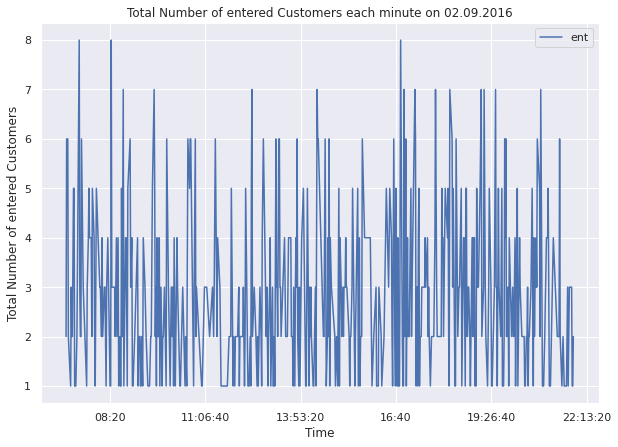

In [307]:
test.plot()
plt.ylabel('Total Number of entered Customers')
plt.xlabel('Time')
plt.title('Total Number of entered Customers each minute on 02.09.2016')


##### How many movement in each minutes? (Monday)

In [317]:
df.head()

,timestamp,customer_no,location,day,hour,after
0,2019-09-02 07:03:00,1-mon,dairy,2,7,checkout
1,2019-09-02 07:03:00,2-mon,dairy,2,7,checkout
2,2019-09-02 07:04:00,3-mon,dairy,2,7,checkout
3,2019-09-02 07:04:00,4-mon,dairy,2,7,checkout
4,2019-09-02 07:04:00,5-mon,spices,2,7,checkout


In [331]:
t = df.iloc[0:1447]
t['time'] = pd.to_datetime(t['timestamp']).dt.time
movements = t.groupby(['time'])["location"].count()
movements.head()

/tmp/ipykernel_389111/2726897352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['time'] = pd.to_datetime(t['timestamp']).dt.time


time
07:03:00    2
07:04:00    6
07:05:00    4
07:06:00    8
07:07:00    4
Name: location, dtype: int64

In [333]:
movements.describe()

count    290.000000
mean       4.989655
std        2.772186
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       13.000000
Name: location, dtype: float64

### Calculate the total number of customers in the supermarket over time.

[Text(0, 0, '317'),
 Text(0, 0, '364'),
 Text(0, 0, '308'),
 Text(0, 0, '282'),
 Text(0, 0, '189'),
 Text(0, 0, '265'),
 Text(0, 0, '412'),
 Text(0, 0, '305'),
 Text(0, 0, '342'),
 Text(0, 0, '307'),
 Text(0, 0, '410'),
 Text(0, 0, '449'),
 Text(0, 0, '404'),
 Text(0, 0, '377'),
 Text(0, 0, '176')]

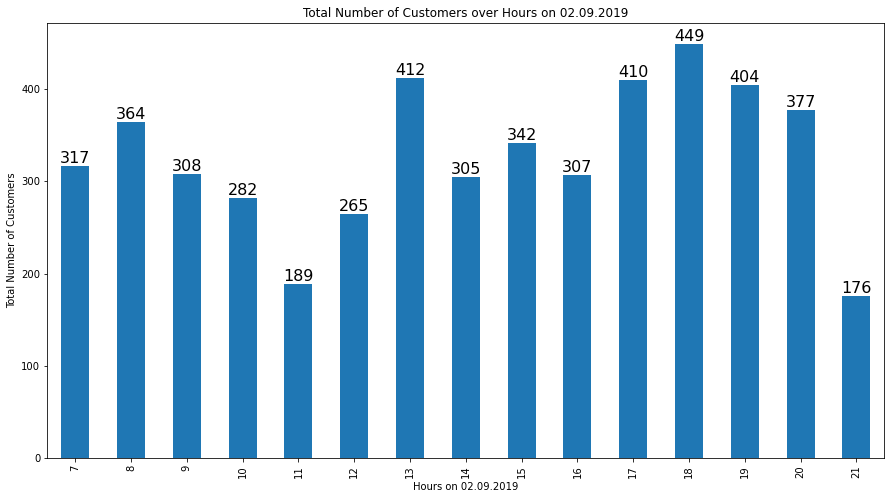

In [45]:
plot = mon.groupby(['hour'])['customer_no'].count().plot(kind='bar', figsize=(15, 8))
plt.ylabel('Total Number of Customers')
plt.xlabel('Hours on 02.09.2019')
plt.title('Total Number of Customers over Hours on 02.09.2019')
plt.bar_label(plot.containers[0],size=16,label_type='edge')

[Text(0, 0, '1544'),
 Text(0, 0, '2290'),
 Text(0, 0, '1520'),
 Text(0, 0, '1431'),
 Text(0, 0, '1111'),
 Text(0, 0, '1252'),
 Text(0, 0, '1754'),
 Text(0, 0, '1650'),
 Text(0, 0, '1335'),
 Text(0, 0, '1742'),
 Text(0, 0, '1889'),
 Text(0, 0, '2215'),
 Text(0, 0, '2558'),
 Text(0, 0, '1655'),
 Text(0, 0, '1010')]

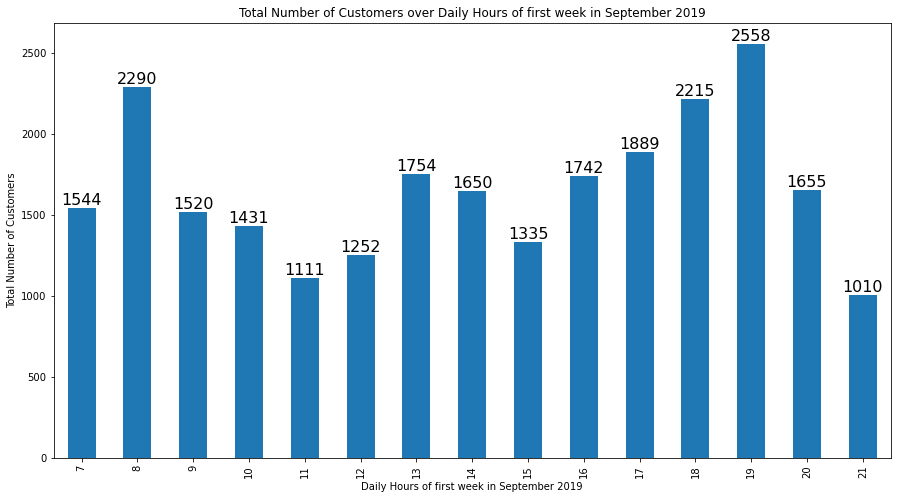

In [46]:
plot = df.groupby(['hour'])['customer_no'].count().plot(kind='bar', figsize=(15, 8))
plt.ylabel('Total Number of Customers')
plt.xlabel('Daily Hours of first week in September 2019')
plt.title('Total Number of Customers over Daily Hours of first week in September 2019')
plt.bar_label(plot.containers[0],size=16,label_type='edge')

[Text(0, 0, '4963'),
 Text(0, 0, '4714'),
 Text(0, 0, '5050'),
 Text(0, 0, '5104'),
 Text(0, 0, '5125')]

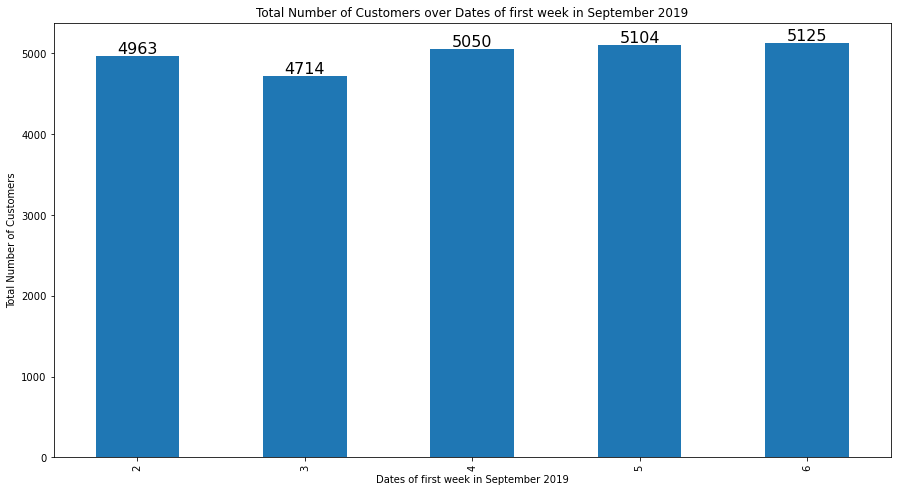

In [47]:
plot = df.groupby(['day'])['customer_no'].count().plot(kind='bar', figsize=(15, 8))
plt.ylabel('Total Number of Customers')
plt.xlabel('Dates of first week in September 2019')
plt.title('Total Number of Customers over Dates of first week in September 2019')
plt.bar_label(plot.containers[0],size=16,label_type='edge')

### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

#### How often people enter from each section (bar plot)?

In [48]:
def entrance_list(df):
    """
    This function creates a list of the locations where customers went first.
    """
    entrance=[]

#     for cus in df['customer_no']:
    while True:
        entrance.append(df['location'].iloc[0])
        cus = df['customer_no'].iloc[0]
        df = df[df.customer_no != cus]
#         df = df.drop(df.loc[df['customer_no'] == cus].index)
        if df.shape[0] == 0:
            break
    return entrance

# I learned that the object that I am looping through it shouldn't change.
# Also (( df = df[df.customer_no != cus] )) works better for cleaning all the rows 
#with that specific value

In [49]:
ent = entrance_list(df)
ent

['dairy',
 'dairy',
 'dairy',
 'dairy',
 'spices',
 'spices',
 'spices',
 'fruit',
 'dairy',
 'fruit',
 'drinks',
 'spices',
 'dairy',
 'fruit',
 'spices',
 'dairy',
 'fruit',
 'fruit',
 'spices',
 'drinks',
 'drinks',
 'fruit',
 'fruit',
 'drinks',
 'spices',
 'fruit',
 'spices',
 'drinks',
 'drinks',
 'spices',
 'spices',
 'drinks',
 'fruit',
 'spices',
 'dairy',
 'dairy',
 'fruit',
 'fruit',
 'dairy',
 'dairy',
 'drinks',
 'dairy',
 'fruit',
 'fruit',
 'spices',
 'fruit',
 'drinks',
 'drinks',
 'spices',
 'fruit',
 'fruit',
 'drinks',
 'fruit',
 'spices',
 'spices',
 'fruit',
 'fruit',
 'drinks',
 'dairy',
 'fruit',
 'spices',
 'spices',
 'spices',
 'drinks',
 'drinks',
 'spices',
 'dairy',
 'spices',
 'fruit',
 'spices',
 'dairy',
 'spices',
 'dairy',
 'spices',
 'spices',
 'drinks',
 'fruit',
 'spices',
 'dairy',
 'dairy',
 'drinks',
 'drinks',
 'fruit',
 'fruit',
 'drinks',
 'spices',
 'drinks',
 'dairy',
 'drinks',
 'spices',
 'fruit',
 'dairy',
 'dairy',
 'drinks',
 'drinks',
 

In [50]:
len(ent)

7445

<AxesSubplot:>

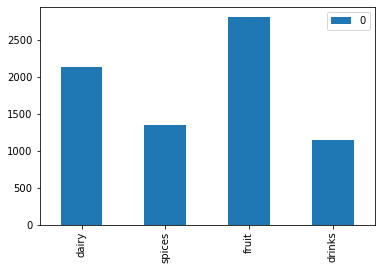

In [51]:
from collections import Counter

state_counts = Counter(ent)
df_plt = pd.DataFrame.from_dict(state_counts, orient='index')
df_plt.plot(kind='bar')

# Markov Chain

## Creating transition probability matrix

In [52]:
df['after'] = df.groupby('customer_no')['location'].shift(-1)

In [53]:
df.head(10)

,timestamp,customer_no,location,day,hour,after
0,2019-09-02 07:03:00,1-mon,dairy,2,7,checkout
1,2019-09-02 07:03:00,2-mon,dairy,2,7,checkout
2,2019-09-02 07:04:00,3-mon,dairy,2,7,checkout
3,2019-09-02 07:04:00,4-mon,dairy,2,7,checkout
4,2019-09-02 07:04:00,5-mon,spices,2,7,checkout
5,2019-09-02 07:04:00,6-mon,spices,2,7,dairy
6,2019-09-02 07:04:00,7-mon,spices,2,7,drinks
7,2019-09-02 07:04:00,8-mon,fruit,2,7,checkout
8,2019-09-02 07:05:00,1-mon,checkout,2,7,NaN
9,2019-09-02 07:05:00,5-mon,checkout,2,7,NaN


In [54]:
cross_table = pd.crosstab(df['location'], df['after'], normalize=0)
cross_table.head(5)

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [55]:
cross_table['sum'] = cross_table['checkout'] + cross_table['dairy'] + cross_table['drinks'] +cross_table['fruit'] +cross_table['spices']
cross_table.head(5)

after,checkout,dairy,drinks,fruit,spices,sum
location,,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
dairy,0.393033,0.000000,0.222483,0.189357,0.195127,1.0
drinks,0.537260,0.027145,0.000000,0.218950,0.216645,1.0
fruit,0.500195,0.237993,0.136080,0.000000,0.125732,1.0
spices,0.251998,0.323122,0.272776,0.152104,0.000000,1.0


In [57]:
df = df.fillna('checkout')
df.head(10)

,timestamp,customer_no,location,day,hour,after
0,2019-09-02 07:03:00,1-mon,dairy,2,7,checkout
1,2019-09-02 07:03:00,2-mon,dairy,2,7,checkout
2,2019-09-02 07:04:00,3-mon,dairy,2,7,checkout
3,2019-09-02 07:04:00,4-mon,dairy,2,7,checkout
4,2019-09-02 07:04:00,5-mon,spices,2,7,checkout
5,2019-09-02 07:04:00,6-mon,spices,2,7,dairy
6,2019-09-02 07:04:00,7-mon,spices,2,7,drinks
7,2019-09-02 07:04:00,8-mon,fruit,2,7,checkout
8,2019-09-02 07:05:00,1-mon,checkout,2,7,checkout
9,2019-09-02 07:05:00,5-mon,checkout,2,7,checkout


In [58]:
cross_table = pd.crosstab(df['location'], df['after'], normalize=0)
cross_table['sum'] = cross_table['checkout'] + cross_table['dairy'] + cross_table['drinks'] +cross_table['fruit'] +cross_table['spices']
cross_table.head(5)

after,checkout,dairy,drinks,fruit,spices,sum
location,,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
dairy,0.393033,0.000000,0.222483,0.189357,0.195127,1.0
drinks,0.537260,0.027145,0.000000,0.218950,0.216645,1.0
fruit,0.500195,0.237993,0.136080,0.000000,0.125732,1.0
spices,0.251998,0.323122,0.272776,0.152104,0.000000,1.0


In [59]:
cross_table.drop(columns = ['sum'], inplace = True)
cross_table.head(5)

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


## Visualize the probabilities as a heat map

<AxesSubplot:xlabel='after', ylabel='location'>

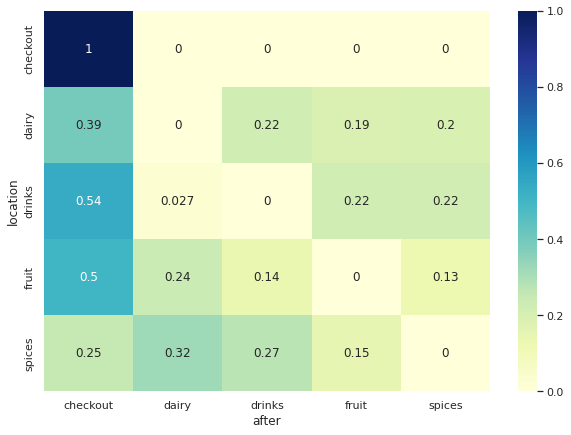

In [60]:
sn.set(rc={'figure.figsize':(10,7)})

sn.heatmap(cross_table, cmap="YlGnBu", annot=True)

# Writing a Customer class

In [61]:
import random

In [62]:
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """
    
    def __init__(self, name, state, transition_probs, budget=100):
        self.name = name
        self.state = state
        self.budget = budget
        self.transition_probs = transition_probs
        self.is_active = True
    
    def __repr__(self):
        return f'<Customer {self.name} in {self.state}>'  
    
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        ''' 
        #np.random.choice(a, p=..) -> Generates a random sample from a given 1-D array 
        #(a: 1-D array , p: The probabilities associated with each entry in a.)
        vector = self.transition_probs.loc[self.state]
        next_state = np.random.choice(["checkout", "dairy", "drinks", "fruit", "spices"], p = vector)
        self.state = next_state
        print(f'''{self.name} is moved to {self.state}''')
        if self.state == 'checkout':
            self.set_status(False)  

    # define a getter and setter for status
    def get_status(self):
        return self.is_active
    
    def set_status(self, value):
        self.is_active = value
    

            

In [63]:
transition_probs = cross_table
transition_probs

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [64]:
cust1 = Customer("Jake", "drinks",transition_probs, 50)
cust2 = Customer("Margaret", "spices", transition_probs)

In [65]:
print(cust1.name, cust1.state)

Jake drinks


In [66]:
print(cust2.name, cust2.budget)

Margaret 100


In [67]:
print(cust1)

<Customer Jake in drinks>


In [68]:
cust1.next_state()

Jake is moved to checkout


In [69]:
cust1.get_status()

False

# Adding another class for the supermarket (Composition)

In [70]:
from faker import Faker
import csv

f = Faker(use_weighting = False)

In [357]:
class Supermarket:
    """
    a supermarket that has some customers and the number of customers change 
    during the time.
    """

    def __init__(self):
        self.customers = [] 
        self.num_of_cus = 0
        self.min = 2
        self.cus_left = 0
        self.hour = 7
    
    def save_result(self):
        with open('result.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Time", "cus_name", "Location"])
            file.close()
    
    def __repr__(self):
        return f'<Supermarket {self.name} has {self.num_of_cus} customers now>'  
    
    def add_cus(self):
        '''adds a customer to the supermarket, with a random name and state to the customers list'''
        name = f.first_name()
        state = np.random.choice(["dairy", "drinks", "fruit", "spices"])
        transition_probs = cross_table
        new_cus = Customer(name, state, transition_probs)
        self.customers.append(new_cus)
        self.num_of_cus += 1
        print(f'A new customer named {new_cus.name} was entered from {new_cus.state} state!')
        with open('result.csv', mode='a') as file:
            writer = csv.writer(file)
            writer.writerow([f'''{self.hour}:{self.min}:00''', name, state])
            file.close()
       
            
    def remove_out(self):
        '''remove any customer where self.is_active = False'''
        cus_out = []
        for cus in self.customers:
            if cus.get_status() == False:
                cus_out.append(cus)
                self.cus_left += 1
                self.num_of_cus -=1
        self.customers = list(set(self.customers) - set(cus_out))

          
    
    def next_min(self):
        '''adds one hour and a random number of customers to the supermarket'''
      
        self.min += 1
        if self.min == 61:
            self.min = 1
            self.hour += 1
        # Forcing out customers at 21:50        
        if self.hour == 21 & self.min == 51:
            for cus in self.customers:
                cus.status = 'checkout'
                with open('result.csv', mode='a') as file:
                    writer = csv.writer(file)
                    writer.writerow([f'''{self.hour}:{self.min}:00''', cus.name, cus.state])
                    file.close()
        # Removing customers who were in checkout
        self.remove_out()
        # Moving customers to a new state
        if len(self.customers) < 10:
            r_num = len(self.customers)
        else:
            r_num = random.choice([i for i in range(1,8)])
        for cus in random.sample(self.customers, r_num):
            cus.next_state()
            with open('result.csv', mode='a') as file:
                writer = csv.writer(file)
                writer.writerow([f'''{self.hour}:{self.min}:00''', cus.name, cus.state])
                file.close()
        # Adding new customers before 21:50
        n_cus = random.randint(1,5)
        if not self.hour == 21 & self.min == 51:
            for i in range(n_cus):
                self.add_cus()
  
    def one_day(self):
        for i in range(889):  # from 7:02 to 21:50
            self.next_min()
    
    def summary(self):
        print(f'''Now it is {self.hour}:{self.min}:00 and we have {self.num_of_cus} customers in the supermarket.''')
        print(f'''{self.cus_left} customers have left the supermarket''')

In [358]:
sup = Supermarket()

In [359]:
sup.save_result()

In [360]:
sup.one_day()

A new customer named Amber was entered from drinks state!
A new customer named Rebekah was entered from spices state!
A new customer named Christine was entered from spices state!
A new customer named Renee was entered from spices state!
A new customer named Don was entered from spices state!
Don is moved to fruit
Christine is moved to checkout
Rebekah is moved to drinks
Renee is moved to checkout
Amber is moved to spices
A new customer named Lisa was entered from fruit state!
A new customer named Kyle was entered from spices state!
Lisa is moved to spices
Amber is moved to dairy
Don is moved to checkout
Rebekah is moved to checkout
Kyle is moved to drinks
A new customer named Adriana was entered from spices state!
A new customer named Jean was entered from drinks state!
A new customer named Meagan was entered from drinks state!
A new customer named Amy was entered from drinks state!
Amy is moved to checkout
Adriana is moved to drinks
Amber is moved to drinks
Meagan is moved to checkou

Mackenzie is moved to checkout
A new customer named Yesenia was entered from dairy state!
A new customer named Emma was entered from fruit state!
A new customer named Janet was entered from drinks state!
Shannon is moved to checkout
Harry is moved to fruit
Shelley is moved to drinks
James is moved to checkout
Frank is moved to spices
A new customer named Leon was entered from drinks state!
A new customer named Eddie was entered from drinks state!
Earl is moved to fruit
Gabriel is moved to spices
Clifford is moved to checkout
Sherri is moved to dairy
Sylvia is moved to spices
Mackenzie is moved to dairy
A new customer named Jasmine was entered from fruit state!
Yesenia is moved to fruit
A new customer named Charlotte was entered from drinks state!
A new customer named Mikayla was entered from drinks state!
Sylvia is moved to checkout
Cristina is moved to spices
Ethan is moved to fruit
Caitlin is moved to checkout
Eddie is moved to checkout
A new customer named Priscilla was entered from

Jonathan is moved to checkout
Edwin is moved to checkout
Sandra is moved to checkout
Gabriel is moved to checkout
A new customer named Dennis was entered from fruit state!
A new customer named Vanessa was entered from drinks state!
A new customer named Dylan was entered from drinks state!
Frank is moved to dairy
Miguel is moved to checkout
Theresa is moved to spices
Earl is moved to checkout
Alison is moved to drinks
Ryan is moved to fruit
A new customer named Michele was entered from fruit state!
A new customer named Julia was entered from drinks state!
A new customer named Christine was entered from drinks state!
A new customer named Priscilla was entered from dairy state!
A new customer named Alfred was entered from drinks state!
Brooke is moved to checkout
Samantha is moved to checkout
Candace is moved to dairy
Theresa is moved to drinks
Perry is moved to fruit
Sharon is moved to checkout
A new customer named Kristine was entered from dairy state!
A new customer named Mercedes was 

Angie is moved to spices
Molly is moved to spices
A new customer named Cheyenne was entered from spices state!
Colleen is moved to fruit
Ann is moved to drinks
Tommy is moved to drinks
Kathryn is moved to spices
Cheyenne is moved to drinks
Mary is moved to fruit
Frank is moved to checkout
A new customer named Danny was entered from spices state!
A new customer named Thomas was entered from spices state!
A new customer named Kyle was entered from fruit state!
A new customer named Melissa was entered from spices state!
Rose is moved to checkout
Misty is moved to checkout
Shawna is moved to checkout
A new customer named Tina was entered from spices state!
Miranda is moved to checkout
A new customer named Bonnie was entered from fruit state!
A new customer named Dorothy was entered from spices state!
A new customer named Jenna was entered from dairy state!
Jeremy is moved to drinks
A new customer named Briana was entered from drinks state!
A new customer named Charles was entered from frui

Stefanie is moved to checkout
Audrey is moved to checkout
A new customer named Alexis was entered from drinks state!
A new customer named Tyrone was entered from drinks state!
A new customer named Shawna was entered from spices state!
A new customer named Shirley was entered from fruit state!
Maurice is moved to checkout
Alice is moved to drinks
Cody is moved to fruit
Christy is moved to checkout
Ryan is moved to drinks
Cindy is moved to spices
Colton is moved to checkout
A new customer named Mckenzie was entered from fruit state!
A new customer named Cheryl was entered from dairy state!
A new customer named Neil was entered from dairy state!
Alexander is moved to fruit
Don is moved to fruit
A new customer named Julie was entered from fruit state!
A new customer named Stephanie was entered from dairy state!
A new customer named Sherri was entered from drinks state!
A new customer named Johnathan was entered from drinks state!
A new customer named Cassandra was entered from dairy state!

Connor is moved to drinks
A new customer named Pedro was entered from spices state!
A new customer named Janet was entered from dairy state!
A new customer named Kimberly was entered from spices state!
A new customer named Neil was entered from spices state!
A new customer named Kristina was entered from fruit state!
Priscilla is moved to checkout
Howard is moved to drinks
Jaclyn is moved to fruit
Kristine is moved to checkout
A new customer named Isaiah was entered from drinks state!
Jimmy is moved to fruit
A new customer named Angelica was entered from fruit state!
A new customer named Brady was entered from dairy state!
A new customer named Brandon was entered from drinks state!
A new customer named Kristy was entered from drinks state!
Thomas is moved to dairy
Fred is moved to dairy
Clinton is moved to spices
A new customer named Cameron was entered from drinks state!
Jimmy is moved to spices
Cole is moved to fruit
Mackenzie is moved to spices
Christina is moved to spices
Anna is m

A new customer named Jade was entered from spices state!
Sarah is moved to drinks
Taylor is moved to checkout
Greg is moved to checkout
Glenn is moved to checkout
A new customer named Joy was entered from spices state!
A new customer named Marie was entered from dairy state!
A new customer named Cindy was entered from drinks state!
A new customer named Terrence was entered from drinks state!
A new customer named Kellie was entered from dairy state!
Laura is moved to dairy
Jimmy is moved to dairy
Cindy is moved to checkout
A new customer named Rebecca was entered from drinks state!
A new customer named Kristopher was entered from dairy state!
A new customer named Harold was entered from spices state!
A new customer named Bradley was entered from spices state!
A new customer named Tasha was entered from drinks state!
Autumn is moved to spices
Riley is moved to spices
Maurice is moved to checkout
Meghan is moved to checkout
Kellie is moved to drinks
A new customer named Jose was entered f

Harold is moved to drinks
Joanne is moved to drinks
Laura is moved to drinks
Nicolas is moved to drinks
A new customer named Mackenzie was entered from dairy state!
A new customer named Whitney was entered from fruit state!
Joy is moved to fruit
Desiree is moved to dairy
Alexandria is moved to checkout
Janet is moved to drinks
Logan is moved to fruit
Jose is moved to spices
A new customer named Anne was entered from spices state!
A new customer named Amy was entered from drinks state!
A new customer named Joanna was entered from fruit state!
A new customer named Jody was entered from drinks state!
Felicia is moved to dairy
Lance is moved to spices
Kellie is moved to dairy
A new customer named Christian was entered from fruit state!
Edward is moved to drinks
Ryan is moved to checkout
Erika is moved to drinks
Eugene is moved to drinks
Angie is moved to dairy
Francisco is moved to drinks
A new customer named Jason was entered from drinks state!
A new customer named Parker was entered from

Casey is moved to checkout
Shane is moved to checkout
Lydia is moved to spices
A new customer named Tricia was entered from fruit state!
Angelica is moved to drinks
Francisco is moved to checkout
Mark is moved to drinks
Evelyn is moved to drinks
A new customer named Clarence was entered from drinks state!
A new customer named Pamela was entered from fruit state!
A new customer named Fernando was entered from dairy state!
A new customer named Kylie was entered from fruit state!
Grant is moved to checkout
Judy is moved to fruit
Whitney is moved to fruit
A new customer named Kendra was entered from fruit state!
Amy is moved to dairy
Laura is moved to checkout
A new customer named Beverly was entered from fruit state!
A new customer named Lisa was entered from dairy state!
Yvette is moved to dairy
Tonya is moved to fruit
Brian is moved to checkout
Tony is moved to drinks
Cassandra is moved to checkout
A new customer named Cathy was entered from fruit state!
Erika is moved to checkout
Steve

A new customer named Kiara was entered from drinks state!
A new customer named Savannah was entered from spices state!
A new customer named Kenneth was entered from drinks state!
A new customer named Jeff was entered from drinks state!
Alice is moved to dairy
Stacey is moved to checkout
Frances is moved to fruit
A new customer named Becky was entered from spices state!
A new customer named Tracey was entered from fruit state!
A new customer named Manuel was entered from fruit state!
A new customer named Jody was entered from drinks state!
A new customer named Jasmin was entered from drinks state!
Felicia is moved to checkout
A new customer named Jonathan was entered from fruit state!
A new customer named Ruben was entered from dairy state!
A new customer named Frances was entered from drinks state!
A new customer named Peter was entered from dairy state!
Kaylee is moved to checkout
Michele is moved to checkout
Alyssa is moved to checkout
Jacob is moved to checkout
A new customer named 

Tabitha is moved to dairy
Adrienne is moved to checkout
A new customer named Brady was entered from dairy state!
A new customer named Faith was entered from dairy state!
Autumn is moved to checkout
Michelle is moved to spices
Mallory is moved to dairy
Carly is moved to fruit
Marie is moved to spices
James is moved to dairy
Manuel is moved to checkout
A new customer named Caroline was entered from spices state!
A new customer named Samuel was entered from spices state!
A new customer named Brandi was entered from drinks state!
A new customer named Latoya was entered from spices state!
Philip is moved to checkout
Andres is moved to checkout
Lisa is moved to checkout
Christian is moved to spices
A new customer named Dakota was entered from fruit state!
A new customer named Stephen was entered from fruit state!
A new customer named Stephanie was entered from fruit state!
A new customer named Peggy was entered from drinks state!
Judy is moved to checkout
A new customer named Greg was entere

Amber is moved to spices
Teresa is moved to fruit
Tamara is moved to checkout
A new customer named Geoffrey was entered from dairy state!
A new customer named Vincent was entered from fruit state!
A new customer named Miranda was entered from drinks state!
A new customer named Maurice was entered from drinks state!
A new customer named Carla was entered from spices state!
Andrea is moved to spices
Jacob is moved to drinks
Joanna is moved to spices
Vickie is moved to checkout
Joy is moved to checkout
Amber is moved to checkout
A new customer named Monique was entered from spices state!
A new customer named Stacy was entered from fruit state!
A new customer named Adrian was entered from dairy state!
A new customer named Madeline was entered from fruit state!
A new customer named Bill was entered from dairy state!
Jon is moved to checkout
Clarence is moved to checkout
Janet is moved to spices
Kristopher is moved to dairy
Mike is moved to dairy
A new customer named Jeffery was entered from

Jeremiah is moved to drinks
Joanne is moved to spices
Sally is moved to dairy
Mike is moved to checkout
Beverly is moved to dairy
A new customer named Andres was entered from dairy state!
Guy is moved to checkout
Stanley is moved to checkout
Tami is moved to drinks
A new customer named Dean was entered from dairy state!
Catherine is moved to checkout
Ricky is moved to dairy
Mary is moved to checkout
Shawn is moved to spices
Suzanne is moved to spices
A new customer named Alec was entered from drinks state!
A new customer named Jackson was entered from fruit state!
A new customer named Beth was entered from dairy state!
A new customer named Janice was entered from dairy state!
A new customer named Randall was entered from fruit state!
Audrey is moved to checkout
Ruben is moved to checkout
Alice is moved to checkout
Alfred is moved to checkout
Christina is moved to checkout
Marie is moved to dairy
Tammie is moved to checkout
A new customer named Glen was entered from spices state!
Matthe

Erika is moved to drinks
Mackenzie is moved to dairy
Kristie is moved to fruit
Tommy is moved to checkout
Natasha is moved to fruit
A new customer named Terry was entered from fruit state!
A new customer named Gail was entered from drinks state!
A new customer named Lindsay was entered from spices state!
A new customer named Diane was entered from fruit state!
A new customer named Alexandra was entered from spices state!
Andrea is moved to checkout
Joan is moved to drinks
A new customer named Gwendolyn was entered from dairy state!
A new customer named Heidi was entered from drinks state!
A new customer named Shelley was entered from dairy state!
Anthony is moved to checkout
Peter is moved to checkout
Hector is moved to checkout
Devin is moved to checkout
Martin is moved to checkout
A new customer named Alan was entered from drinks state!
Aaron is moved to fruit
Reginald is moved to checkout
Anna is moved to fruit
Joann is moved to spices
A new customer named Evelyn was entered from sp

Pedro is moved to fruit
Rodney is moved to dairy
Lydia is moved to dairy
Allison is moved to drinks
A new customer named Wanda was entered from dairy state!
A new customer named Frederick was entered from spices state!
A new customer named Stacey was entered from drinks state!
A new customer named Gabriella was entered from dairy state!
A new customer named Bethany was entered from dairy state!
Sierra is moved to spices
Greg is moved to fruit
Candace is moved to dairy
Gwendolyn is moved to drinks
Mason is moved to dairy
Angela is moved to fruit
A new customer named Katelyn was entered from dairy state!
A new customer named Nancy was entered from spices state!
A new customer named Jillian was entered from drinks state!
A new customer named Shirley was entered from drinks state!
Glenda is moved to dairy
Stacey is moved to spices
Karl is moved to checkout
Fernando is moved to fruit
Hannah is moved to dairy
Tasha is moved to fruit
A new customer named Chris was entered from spices state!
A

Judith is moved to fruit
Terry is moved to checkout
A new customer named Jeffrey was entered from dairy state!
Jeffrey is moved to checkout
A new customer named Julia was entered from drinks state!
A new customer named Jerome was entered from dairy state!
Janice is moved to drinks
Brad is moved to drinks
A new customer named Edward was entered from spices state!
A new customer named Rita was entered from dairy state!
A new customer named Terri was entered from fruit state!
Dana is moved to checkout
Rebecca is moved to checkout
Caroline is moved to checkout
Daryl is moved to fruit
Seth is moved to fruit
Ashley is moved to dairy
Mackenzie is moved to checkout
A new customer named Barry was entered from spices state!
A new customer named Breanna was entered from dairy state!
A new customer named Carol was entered from dairy state!
A new customer named Mackenzie was entered from drinks state!
April is moved to dairy
Arthur is moved to checkout
Nathan is moved to fruit
Maxwell is moved to s

A new customer named Max was entered from fruit state!
Julia is moved to checkout
Barry is moved to checkout
Mason is moved to checkout
Madison is moved to checkout
Clinton is moved to checkout
Whitney is moved to drinks
A new customer named Charlene was entered from drinks state!
Clinton is moved to fruit
Chelsea is moved to checkout
Veronica is moved to checkout
A new customer named Darrell was entered from spices state!
A new customer named Trevor was entered from fruit state!
A new customer named Jose was entered from spices state!
A new customer named Stephen was entered from fruit state!
A new customer named Marilyn was entered from fruit state!
Carmen is moved to checkout
Carly is moved to drinks
Alison is moved to checkout
Harold is moved to checkout
Tristan is moved to checkout
Mia is moved to spices
Stacey is moved to drinks
A new customer named Lonnie was entered from dairy state!
A new customer named Bruce was entered from fruit state!
A new customer named Jennifer was ente

A new customer named Alvin was entered from spices state!
A new customer named Chris was entered from dairy state!
Alexa is moved to drinks
A new customer named Jesus was entered from spices state!
A new customer named Brittany was entered from drinks state!
A new customer named Cole was entered from spices state!
Kristie is moved to drinks
Jeffrey is moved to drinks
Natasha is moved to dairy
Susan is moved to fruit
A new customer named Gregory was entered from drinks state!
A new customer named Sabrina was entered from spices state!
A new customer named Alice was entered from dairy state!
Heidi is moved to checkout
A new customer named Justin was entered from dairy state!
A new customer named Ellen was entered from dairy state!
A new customer named Julia was entered from fruit state!
A new customer named Jay was entered from drinks state!
A new customer named Lorraine was entered from spices state!
Alyssa is moved to checkout
Brenda is moved to drinks
Jordan is moved to checkout
Mia i

Tasha is moved to dairy
Jeremy is moved to fruit
Tracey is moved to checkout
Sonia is moved to fruit
A new customer named Andre was entered from fruit state!
A new customer named Karen was entered from drinks state!
A new customer named Karina was entered from fruit state!
Alvin is moved to checkout
Dale is moved to checkout
Dalton is moved to dairy
Susan is moved to checkout
A new customer named Don was entered from fruit state!
Joshua is moved to fruit
Sabrina is moved to dairy
Timothy is moved to drinks
Mason is moved to fruit
Lori is moved to dairy
Isabel is moved to drinks
A new customer named Parker was entered from spices state!
A new customer named Javier was entered from fruit state!
Helen is moved to drinks
A new customer named Donna was entered from dairy state!
Heidi is moved to dairy
Beth is moved to checkout
Jennifer is moved to dairy
Jake is moved to checkout
Kenneth is moved to drinks
Phillip is moved to checkout
Sarah is moved to checkout
A new customer named Tina was 

Roger is moved to drinks
Lindsay is moved to fruit
A new customer named Adriana was entered from fruit state!
A new customer named Tammy was entered from spices state!
A new customer named Meghan was entered from dairy state!
A new customer named Cassidy was entered from drinks state!
A new customer named Jim was entered from drinks state!
Rebekah is moved to checkout
Mackenzie is moved to fruit
Bryce is moved to checkout
Tracey is moved to checkout
Patty is moved to checkout
Patricia is moved to spices
A new customer named Ruben was entered from drinks state!
A new customer named Angelica was entered from spices state!
A new customer named Todd was entered from drinks state!
A new customer named Ernest was entered from dairy state!
Jake is moved to drinks
Shari is moved to spices
Yesenia is moved to drinks
A new customer named Janet was entered from drinks state!
A new customer named Jose was entered from drinks state!
A new customer named Cristian was entered from dairy state!
A new 

A new customer named Jerry was entered from drinks state!
Brett is moved to checkout
Latoya is moved to checkout
Latasha is moved to checkout
A new customer named Linda was entered from spices state!
A new customer named Sara was entered from dairy state!
A new customer named Lynn was entered from spices state!
A new customer named Gabriella was entered from fruit state!
A new customer named Dave was entered from spices state!
Micheal is moved to spices
Kevin is moved to drinks
Frances is moved to checkout
Brad is moved to checkout
Bianca is moved to spices
Joanne is moved to checkout
A new customer named Don was entered from drinks state!
A new customer named Joy was entered from spices state!
Ronnie is moved to drinks
Noah is moved to spices
Christina is moved to checkout
Shirley is moved to checkout
Wyatt is moved to spices
Audrey is moved to checkout
A new customer named Mckenzie was entered from fruit state!
A new customer named Christine was entered from dairy state!
A new custom

A new customer named Mia was entered from spices state!
A new customer named Kathleen was entered from dairy state!
A new customer named Jane was entered from spices state!
A new customer named Don was entered from dairy state!
A new customer named Kim was entered from dairy state!
Vincent is moved to dairy
Monica is moved to spices
Antonio is moved to drinks
Cesar is moved to dairy
Eileen is moved to checkout
A new customer named Dennis was entered from spices state!
A new customer named Amber was entered from fruit state!
A new customer named Krystal was entered from drinks state!
A new customer named Grant was entered from fruit state!
Jack is moved to checkout
Jose is moved to drinks
Tim is moved to fruit
Natasha is moved to checkout
Kelly is moved to dairy
Tiffany is moved to checkout
Jennifer is moved to drinks
A new customer named Ellen was entered from fruit state!
A new customer named Kelly was entered from dairy state!
A new customer named Mckenzie was entered from spices sta

A new customer named Oscar was entered from spices state!
A new customer named Larry was entered from dairy state!
A new customer named Jeanne was entered from dairy state!
A new customer named Teresa was entered from drinks state!
A new customer named Cassie was entered from dairy state!
Helen is moved to drinks
Leonard is moved to spices
Kari is moved to checkout
Margaret is moved to fruit
Barry is moved to checkout
A new customer named Renee was entered from fruit state!
Lee is moved to dairy
Collin is moved to checkout
Bianca is moved to checkout
A new customer named Claire was entered from drinks state!
A new customer named Christie was entered from fruit state!
A new customer named Julie was entered from fruit state!
A new customer named Sylvia was entered from spices state!
A new customer named Dawn was entered from drinks state!
Christie is moved to spices
A new customer named Janice was entered from dairy state!
A new customer named Chloe was entered from spices state!
Amber i

Todd is moved to spices
Jenny is moved to checkout
Angelica is moved to fruit
Wanda is moved to checkout
Valerie is moved to fruit
Isabella is moved to checkout
A new customer named Joel was entered from dairy state!
A new customer named Ruben was entered from spices state!
A new customer named Colton was entered from drinks state!


In [162]:
sup.num_of_cus

0

In [163]:
sup.customers

[]

In [164]:
sup.min

2

In [165]:
sup.next_min()

A new customer named Colleen was entered from drinks state!
A new customer named Greg was entered from spices state!
A new customer named Latoya was entered from drinks state!
A new customer named Julie was entered from dairy state!
A new customer named Tony was entered from fruit state!
A new customer named Patrick was entered from fruit state!
A new customer named Kristopher was entered from spices state!
A new customer named Breanna was entered from fruit state!
A new customer named Ryan was entered from fruit state!
A new customer named Jim was entered from dairy state!


In [166]:
sup.summary()

Now it is 7:3:00 and we have 10 customers in the supermarket.
0 customers have left the supermarket


In [167]:
sup.next_min()

Patrick is moved to dairy
Greg is moved to dairy
Jim is moved to drinks
Breanna is moved to checkout
Tony is moved to checkout
Kristopher is moved to fruit
Ryan is moved to spices
Latoya is moved to checkout
Colleen is moved to spices
Julie is moved to spices
A new customer named Ian was entered from spices state!
A new customer named Fred was entered from spices state!


In [168]:
sup.summary()

Now it is 7:4:00 and we have 12 customers in the supermarket.
0 customers have left the supermarket


In [349]:
customers = ['a', 'b', 'c', 'd', 'e']
random.sample(customers,random.choice([i for i in range(1,5)]))

['b', 'c']

# Comparing the simulation with real data

In [361]:
sim = pd.read_csv("result.csv", sep = ",")

In [362]:
sim.head()

,Time,cus_name,Location
0,7:3:00,Amber,drinks
1,7:3:00,Rebekah,spices
2,7:3:00,Christine,spices
3,7:3:00,Renee,spices
4,7:3:00,Don,spices


Text(0.5, 0, 'Each Section')

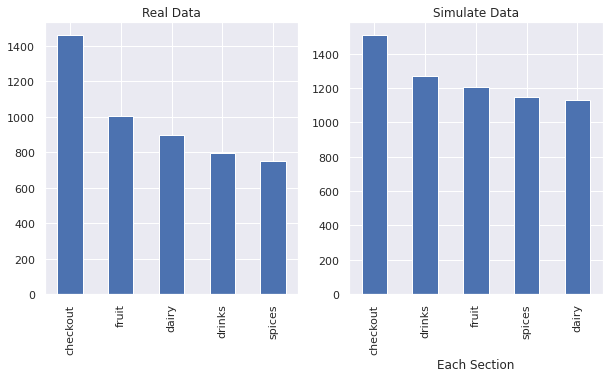

In [363]:

fig, axes = plt.subplots(nrows=1, ncols=2)

mon['location'].value_counts().plot(kind='bar', figsize=(10, 5), ax= axes[0]); axes[0].set_title('Real Data')
# plt.ylabel('Total Number of Customers')
plt.xlabel('Each Section')
# plt.title('Total Number of Customers in Each Section on 02.09.2016')


sim['Location'].value_counts().plot(kind='bar', figsize=(10, 5), ax= axes[1]); axes[1].set_title('Simulate Data')
# plt.ylabel('Total Number of Customers')
plt.xlabel('Each Section')
# plt.title('(Simulation) Total Number of Customers in Each Section on 02.09.2016')

# Fill the Shelves

## Step 1: Load the image

In [241]:
from PIL import Image
import numpy as np

#You have an image of a supermarket built of 32 x 32 pixel tiles


im = Image.open('supermarket.png')
market = np.array(im)
print(market.shape, market.dtype)

(384, 576, 3) uint8


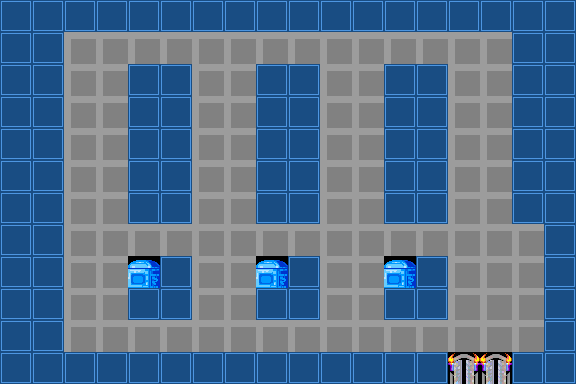

In [242]:
im

In [243]:
market

array([[[ 25,  77, 131],
        [ 25,  77, 131],
        [ 25,  77, 131],
        ...,
        [ 25,  77, 131],
        [ 25,  77, 131],
        [ 25,  77, 131]],

       [[ 25,  77, 131],
        [ 77, 150, 225],
        [ 77, 150, 225],
        ...,
        [ 77, 150, 225],
        [ 77, 150, 225],
        [ 25,  77, 131]],

       [[ 25,  77, 131],
        [ 77, 150, 225],
        [ 25,  77, 131],
        ...,
        [ 25,  77, 131],
        [ 77, 150, 225],
        [ 25,  77, 131]],

       ...,

       [[ 25,  77, 131],
        [ 77, 150, 225],
        [ 25,  77, 131],
        ...,
        [ 25,  77, 131],
        [ 77, 150, 225],
        [ 25,  77, 131]],

       [[ 25,  77, 131],
        [ 77, 150, 225],
        [ 77, 150, 225],
        ...,
        [ 77, 150, 225],
        [ 77, 150, 225],
        [ 25,  77, 131]],

       [[ 25,  77, 131],
        [ 25,  77, 131],
        [ 25,  77, 131],
        ...,
        [ 25,  77, 131],
        [ 25,  77, 131],
        [ 25,  77, 131]]

## Step 2: Load the tiles

In [244]:
tiles_im = Image.open('tiles.png')
tiles = np.array(tiles_im)
print(tiles.shape, tiles.dtype)

(288, 516, 3) uint8


In [245]:
tiles

array([[[ 25,  77, 131],
        [ 25,  77, 131],
        [ 25,  77, 131],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 25,  77, 131],
        [ 77, 150, 225],
        [ 77, 150, 225],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 25,  77, 131],
        [ 77, 150, 225],
        [ 25,  77, 131],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

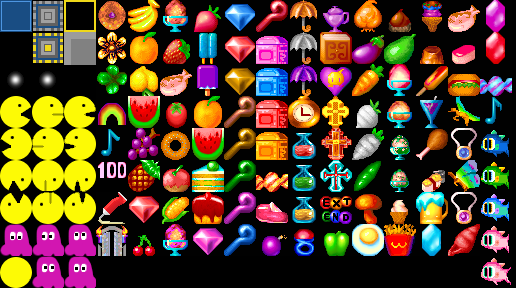

In [246]:
tiles_im

## Step 3: Insert an item

In [247]:
x = 4 * 32   # 5th column starting from 0
y = 1 * 32   # 2nd row
apple = tiles[y:y+32, x:x+32]

In [248]:
tx = 13 * 32
ty = 2 * 32
market[ty:ty+32, tx:tx+32] = apple

## Step 4: Save the image

In [249]:
im = Image.fromarray(market)
im.save('supermarket_filled.png')

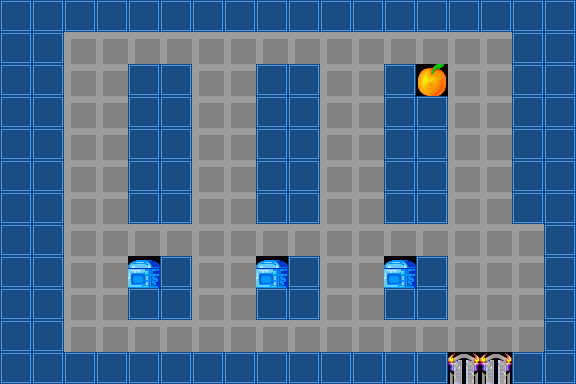

In [250]:
im 

## Step 5: Iterate and improve

### add more items

In [251]:
for i, j in enumerate(range(2, 7)):
    x =  4 * 32 
    y = i * 32 
    fruit = tiles[y:y+32, x:x+32]
    tx = 13 * 32
    ty = j * 32
    market[ty:ty+32, tx:tx+32] = fruit

im = Image.fromarray(market)
im.save('supermarket_filled2.png')
    

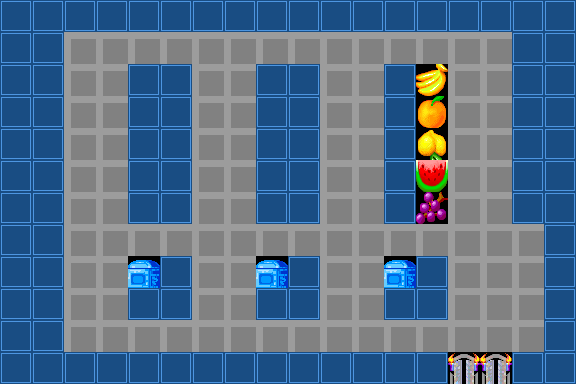

In [252]:
im

## come up with a data structure that holds all the item positions in tiles.png

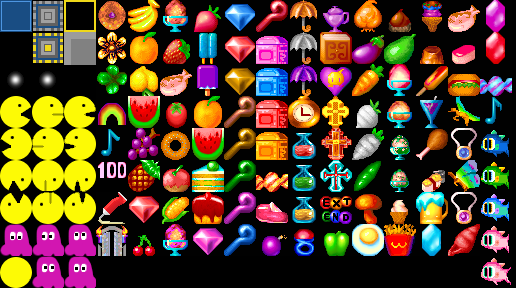

In [253]:
tiles_im

In [254]:
# I think a dictionary will be a good option. 

dictionary = {"apple": tiles[1*32:2*32 , 4*32:5*32, :],
            "banana": tiles[0:1*32 , 4*32:5*32, :]}